In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_excel('data/Transformed Mastersheet.xlsx')

print(df.shape)

# Identify numeric columns only (excludes datetime, strings, etc.)
# added this
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Numeric columns for PCA:", numeric_cols)


scaler = StandardScaler()
scaled_array = scaler.fit_transform(df[numeric_cols])

scaled_df = pd.DataFrame(scaled_array, columns=numeric_cols, index=df.index)
# changed this part  up

print(scaled_df.shape)


print(scaled_df)

print(scaled_df.dtypes)
print(scaled_df.isnull().sum())

print("Before NA drop : " + str(scaled_df.shape))
scaled_df = scaled_df.dropna()
print("AFTER NA drop : " + str(scaled_df.shape))

print(scaled_df.shape)


(90, 17)
Numeric columns for PCA: Index(['Bitcoin', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano',
       'Tether', 'USD Coin', 'LFPR', 'CPI', 'r', 'M1', 'GDP', 'IM', 'EX',
       'CC'],
      dtype='object')
(90, 16)
     Bitcoin  Litecoin       XRP  Ethereum  Dogecoin   Cardano    Tether  \
0   0.817166  0.765307  1.000136  0.253681 -0.209685       NaN  0.347152   
1   1.015845  1.641138  0.533519  1.852187  0.395931       NaN  0.441591   
2   0.165254 -0.259402  0.445469 -0.785577 -0.196273       NaN  0.171991   
3   1.272642  0.515544  0.327256  0.280961  0.186090       NaN  2.929621   
4   2.958342  4.341531  2.772039  1.965111  0.534414       NaN  2.293614   
..       ...       ...       ...       ...       ...       ...       ...   
85 -0.755514 -1.137969 -0.997432 -0.877390 -0.265769 -0.962275 -0.563012   
86 -0.746934 -1.040631 -0.970973 -0.893253 -0.216468 -1.117291 -0.524741   
87 -0.063788  0.415464  1.150477 -0.119898  0.105480  1.373406 -0.514465   
88 -0.795461  0

In [32]:
dropped_df = df.drop(['Month','LFPR', 'CPI', 'r', 'M1', 'GDP', 'IM', 'EX', 'CC','Tether','USD Coin'], axis=1).dropna()
print(dropped_df)

macro_vars = ['Bitcoin', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano']

pca = PCA(n_components=6)

my_data_df_scaled_PCA = pca.fit_transform(scaled_df[macro_vars])


pca_df = pd.DataFrame(my_data_df_scaled_PCA, columns=[f'PC{i+1}' for i in range(6)], index=scaled_df.index)


print(pca_df)



explained_var = pca.explained_variance_
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

summary_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_var))],
    'Eigenvalue': explained_var,
    'Explained Variance (%)': explained_var_ratio * 100,
    'Cumulative Variance (%)': cumulative_var_ratio * 100
})

print(summary_df)


     Bitcoin  Litecoin      XRP  Ethereum  Dogecoin   Cardano
5   0.378704  0.398431 -0.51082  0.445526  0.687963  0.644610
6   0.308668  0.494346 -0.73160  0.377155  0.527182  0.481736
7   0.287190  0.419849 -1.17374  0.294864  0.325088  0.414629
8   0.211008  0.306665 -0.91394  0.316811  0.370604  0.523086
9   0.158605  0.235977 -1.33601  0.288183  0.265931  0.347573
10  0.200430  0.269259 -1.40594  0.268321  0.272660  0.310047
11  0.180727  0.194635 -1.77179  0.189194  0.340245  0.283785
12  0.159449  0.266021 -0.99484  0.262611  0.491315  0.325550
13  0.139450  0.254712 -0.66974  0.372347  0.464335  0.353465
14  0.071761  0.179181 -1.20455  0.208597  0.234505  0.230206
15  0.283116  0.320953 -1.34271  0.320024  0.235807  0.362105
16  0.239558  0.350403 -1.20707  0.391339  0.227278  0.353356
17  0.144907  0.262895 -1.56902  0.277260  0.109578  0.287256
18  0.112671  0.369155 -1.63745  0.277060  0.133312  0.244894
19  0.064713  0.198204 -2.55493  0.134222  0.067571  0.258559
20  0.23

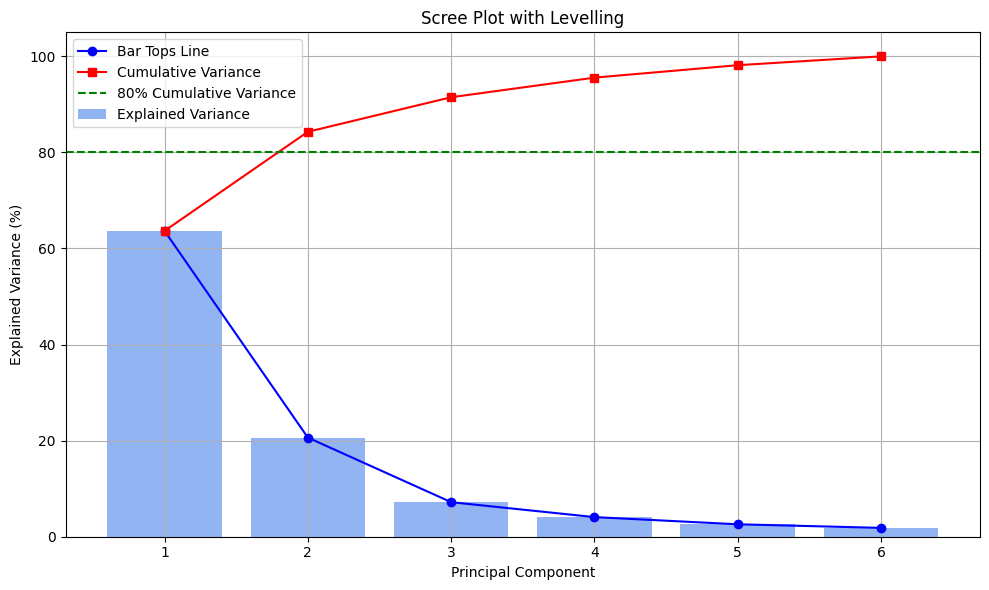

In [33]:

explained_variance_ratio = pca.explained_variance_ratio_[:20]
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components = len(explained_variance_ratio)
avg_explained = 1.0 / n_components  # average variance threshold

x_vals = np.arange(1, n_components + 1)
y_vals = explained_variance_ratio * 100

plt.figure(figsize=(10, 6))

plt.bar(x_vals, y_vals, alpha=0.7, color='cornflowerblue', label='Explained Variance')

plt.plot(x_vals, y_vals, marker='o', color='blue', label='Bar Tops Line')

plt.plot(x_vals, cumulative_variance * 100, marker='s', color='red', label='Cumulative Variance')

# 80% line
plt.axhline(y=80, color='green', linestyle='--', label='80% Cumulative Variance')

# Plot formatting
plt.title('Scree Plot with Levelling')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.xticks(x_vals)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
#added this
loading_df = pd.DataFrame(
    pca.components_.T,
    index=macro_vars,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)

cutoff = 0.5

filtered_loading_df = loading_df[(loading_df.abs() >= cutoff).any(axis=1)]

print(filtered_loading_df)

pc = 'PC1'
print(filtered_loading_df[pc].sort_values(key=abs, ascending=False))

print("Loadings : ")
print(loading_df)
print("Loading Dim : ")
print(loading_df.shape)

# select num_PC = 2
num_PC = 2

               PC1       PC2       PC3       PC4       PC5       PC6
Bitcoin   0.419624 -0.137166 -0.327516 -0.616110 -0.431596 -0.363275
Litecoin  0.435461 -0.051587 -0.017471  0.137831  0.707674 -0.536291
XRP       0.420076  0.003151  0.840886 -0.267414 -0.026004  0.210358
Ethereum  0.478769 -0.127783 -0.417561 -0.016340  0.237276  0.723552
Dogecoin  0.170848  0.978992 -0.102717 -0.034802 -0.023778  0.007580
Cardano   0.446561 -0.061318  0.020757  0.726927 -0.505352 -0.112198
Ethereum    0.478769
Cardano     0.446561
Litecoin    0.435461
XRP         0.420076
Bitcoin     0.419624
Dogecoin    0.170848
Name: PC1, dtype: float64
Loadings : 
               PC1       PC2       PC3       PC4       PC5       PC6
Bitcoin   0.419624 -0.137166 -0.327516 -0.616110 -0.431596 -0.363275
Litecoin  0.435461 -0.051587 -0.017471  0.137831  0.707674 -0.536291
XRP       0.420076  0.003151  0.840886 -0.267414 -0.026004  0.210358
Ethereum  0.478769 -0.127783 -0.417561 -0.016340  0.237276  0.723552
Dogecoin

In [ ]:
scores = pd.DataFrame(my_data_df_scaled_PCA[:, :num_PC], columns=[f'PC{i+1}' for i in range(num_PC)], index=scaled_df.index)

print("PCA scores : ")

print(scores)

print("PCA scores shape : ")

print(scores.shape)

loadings_times_sd = pca.components_.T[:, :num_PC] * np.sqrt(pca.explained_variance_[:num_PC])

loadings_times_sd_df = pd.DataFrame(loadings_times_sd)

print("loadings_times_sd_df shape : ")
print(loadings_times_sd_df.shape)


print("original data df.shape : ")
print(df.shape)

loadings_times_sd_mat = np.array(loadings_times_sd_df)

df_mat = np.array(dropped_df)

new_data_mat = np.matmul(df_mat, loadings_times_sd_mat)

print(new_data_mat)



new_data_df = pd.DataFrame(new_data_mat, columns=[f'PC{i+1}' for i in range(num_PC)])

print("new_data_df shape : ")
print(new_data_df.shape)

print("new_data_df  : ")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000) # Adjust width as needed
print(new_data_df)


# Now use this to predict your dependent variable which you *hopefully* did not include while doing the PCA :)

PCA scores : 
         PC1       PC2
16  2.045257 -0.634865
17  0.109795 -0.436043
18  0.110665 -0.365248
19 -2.130936 -0.143232
20  0.627871 -0.169787
21  1.611559 -0.484373
22  1.075064 -0.691767
23  1.176624 -0.399224
24 -0.691916 -0.286998
25  0.128671 -0.213873
26 -0.429362 -0.329881
27 -1.309259  0.230030
28 -1.299164 -0.161814
29  1.458833  8.560822
30  0.128850 -0.209689
31  7.314264 -1.432714
32  0.433091 -0.459176
33 -0.269108 -0.401194
34 -1.963949 -0.132568
35 -0.532906  0.460484
36 -0.468894 -0.180308
37  0.482536 -0.403654
38 -1.985133 -0.214112
39  1.739772 -0.236644
40  1.832671 -0.145323
41  4.497563  1.545971
42  2.909276  0.045212
43  0.619372 -0.253895
44  1.612071  1.003030
45  6.618786 -0.469255
46  1.659862  0.076431
47 -0.533832 -0.162952
48  0.867008  0.015900
49  1.293913 -0.312125
50 -0.463601 -0.028763
51  0.046841 -0.272733
52  0.206074 -0.123336
53  0.111073 -0.271094
54  0.566899 -0.331628
55 -0.728542 -0.207608
56 -0.830097  0.159448
57  2.352034 -0.3376

In [ ]:
#new_data_df.to_excel("crypto_PCA.xlsx", index=False)